In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification, load_wine, load_breast_cancer, load_diabetes, load_digits

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
def plot_scatter(x, y, auto_scaled=True, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, cmap='bwr')
    
    if not auto_scaled:
        plt.axis('square')
    
    plt.grid(True)
    plt.title(title)
    
    plt.show()
    
def return_X_y(data, target_column):
    return data.drop(target_column, axis=1), data[target_column]

In [4]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

# Homework

## Exercise  1 - Scaling (2 points)

Perform standardization for wine dataset (`wine_data`) using only basic python, numpy and pandas (without using `StandardScaler` and sklearn at all). Implementation of function (or class) that can get dataset as input and return standardized dataset as output is preferrable, but not necessary.

Compare you results (output) with `StandardScaler`.

**NOTE:**

- 1 point for functional version, 2 points for implementing scaling as sklearn pipeline compartible class. 
- Maximum for the exercise is 2 points.


### Simple version (1 point)

In [37]:
wine_data.std(ddof=0).values

array([8.09542915e-01, 1.11400363e+00, 2.73572294e-01, 3.33016976e+00,
       1.42423077e+01, 6.24090564e-01, 9.96048950e-01, 1.24103260e-01,
       5.70748849e-01, 2.31176466e+00, 2.27928607e-01, 7.07993265e-01,
       3.14021657e+02])

In [65]:
wine_data.std().values

array([8.11826538e-01, 1.11714610e+00, 2.74344009e-01, 3.33956377e+00,
       1.42824835e+01, 6.25851049e-01, 9.98858685e-01, 1.24453340e-01,
       5.72358863e-01, 2.31828587e+00, 2.28571566e-01, 7.09990429e-01,
       3.14907474e+02])

In [31]:
StandardScaler().fit(wine_data).scale_

array([8.09542915e-01, 1.11400363e+00, 2.73572294e-01, 3.33016976e+00,
       1.42423077e+01, 6.24090564e-01, 9.96048950e-01, 1.24103260e-01,
       5.70748849e-01, 2.31176466e+00, 2.27928607e-01, 7.07993265e-01,
       3.14021657e+02])

In [38]:
# 1 point
def scale(X):
    return (X - X.mean())/X.std(ddof=0)

In [40]:
assert np.allclose(np.array(scale(wine_data)), StandardScaler().fit_transform(wine_data))

### Pipeline Version (2 points)

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [45]:
# 2 points
from sklearn.base import BaseEstimator, TransformerMixin
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, copy=True, with_mean=True, with_std=True):
        # your code here
        self.with_mean = with_mean
        self.with_std = with_std
        
    def fit(self, X, y=None):
        # your code here
        if self.with_mean:
            self.mean_ = X.mean()
        else:
            self.mean_ = 0
        if self.with_std:
            self.scale_ = X.std(ddof=0)
        else:
            self.scale_ = 1

    def transform(self, X, y=None, copy=None):
        # your code here
        return (X - self.mean_)/self.scale_
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [44]:
assert np.allclose(CustomScaler().fit_transform(wine_data), StandardScaler().fit_transform(wine_data))

## Exercise  2 - Visualization (3 points)

As noted earlier, standardization/normalization of data can be crucial for some distance-based ML methods.

Let’s generate some toy example of unnormalized data and visualize the importance of this process once more:

In [96]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])
data 

array([[ 3.75894393e+00, -9.98236504e-02],
       [ 8.34392137e+00, -7.74332785e-01],
       [-1.65313879e+01, -2.06978213e-02],
       ...,
       [-1.13294571e+00,  4.75147462e+00],
       [-2.37514582e+01,  5.22102762e+00],
       [ 2.96638634e+00,  6.23435560e+00]])

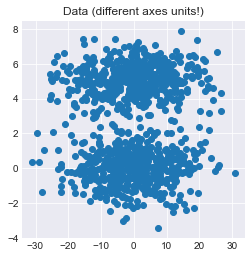

In [97]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=True, title='Data (different axes units!)')

**NOTE:** on the plot above axes are scaled differently and we can clearly see two potential *classes/clusters*. In fact `matplotlib` performed `autoscaling` (which is basically can be considered as `MinMaxScaling` of original data) just for better visualization purposes.

Let's turn this feature off and visualize the original data on the plot with equally scaled axes:

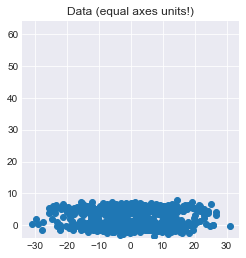

In [98]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False , title='Data (equal axes units!)')

This picture is clearly less interpretable, but much closer to "how distance-based algorithm see the original data": separability of data is hardly noticable only because the variation (std) of x-feature is much bigger in absolute numbers.

Perform `StandardScaling` and `MinMaxScaling` of original data; visualize results for each case (**use `plot_scatter` with `auto_scaled=False`**):

### MinMaxScaling (0.5 point)

In [99]:
def min_max_scaler(x):
    return (x-x.min())/(x.max()-x.min())

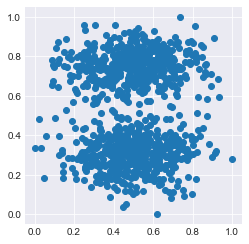

In [100]:
## your code
plot_scatter(min_max_scaler(feature_0), min_max_scaler(feature_1), auto_scaled=False)

### StandardScaler (0.5 point)

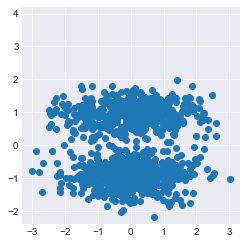

In [101]:
## your code
plot_scatter(StandardScaler().fit_transform(data[:,0,None]), StandardScaler().fit_transform(data[:,1,None]),auto_scaled=False)

### (Bonus) K-means (2 points)

Illustrate the impact of scaling on basic distance-based clustering algorithm [K-means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) using `data` generated above.

**NOTE:** basically, you don't need understanding K-means algorithm here, you just need to:

1) run algorithm (with k=2, k - number of clusters/classes) on unscaled data    
2) run algorithm (with k=2) on scaled data    
3) plot results: highlight different clusters using different colors.

You can use this [question](https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering/89813) as a hint, but I recommend you to plot results using `plot_scatter` with `equal_scaled=True`: it might help you to intuitively understand the reasons of such scaling impact.


In [66]:
from sklearn.cluster import KMeans

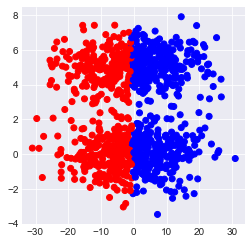

In [102]:
## your code
plot_scatter(data[:,0], data[:,1], clusters=KMeans(n_clusters=2).fit_predict(data), auto_scaled=True)

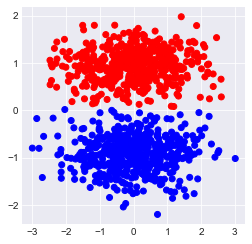

In [103]:
data_scaled = StandardScaler().fit_transform(data)
plot_scatter(data_scaled[:,0], data_scaled[:,1], 
             clusters=KMeans(n_clusters=2).fit_predict(data_scaled),
             auto_scaled=True)

Так как в немасштабированных данных один из признаков имеет гораздо больший размах(дисперсию) это в свою очередь влияет на сходимость алгоритма так как производные в одном направлении оказывают большее влияние, чем в другом.<br>

или как написано в доке sklearn _"если признак имеет дисперсию на порядок большую чем другие признаки, он может внести больший вклад и сделать так, что эстиматор не сможет правильно учиться на других признаках, как предполагалось."_

## Exercise  3 - Preprocessing Pipeline (2 points)

In [79]:
wine_train, wine_val, wine_labels_train, wine_labels_val = train_test_split(wine_data, wine_labels, 
                                                                            test_size=0.3, random_state=42)

Train model (for example, `LogisticRegression(solver='liblinear', penalty='l1')` on raw `wine_train` data; then train same model after data scaling; then add feature selection (and train model again on scaled data). For each experiment all required preprocessing steps (if any) should be wrapped into sklearn pipeline.

Measure `accuracy` of all 3 approaches on `wine_val` dataset. Describe and explain results.

Тренируем лог. регрессию без масштабировани признаков

In [339]:
logit = LogisticRegression(solver='liblinear', penalty='l1')

In [320]:
logit.fit(wine_train, wine_labels_train)

LogisticRegression(penalty='l1', solver='liblinear')

Посмотрим на accuracy на ренировоной выборке

In [321]:
logit.score(wine_train, wine_labels_train)

0.967741935483871

И на тестовой выборке:

In [322]:
logit.score(wine_val, wine_labels_val)

0.9814814814814815

Сделаем пайплайн, где первый шаг будет масштабирование (standardization) признаков:

In [323]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', penalty='l1'))

In [328]:
pipeline.fit(wine_train, wine_labels_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

Accuracy на тренировочкой выборке

In [329]:
pipeline.score(wine_train, wine_labels_train)

1.0

На тестовой

In [331]:
pipeline.score(wine_val, wine_labels_val)

0.9814814814814815

Как видно из метрик, особой разницы для логистической регрессии с L1-reg (с солвером `liblinear`) от использовании масштабированных/немасштабированных признаков не наблюдается.<br>

В документации sklearn при этом отдельно указано, что _Note ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale._ Так что попробуем это проверить (только ‘saga’ поддерживает л1 регуляризацию)

In [361]:
logit_saga = LogisticRegression(penalty='l1', solver='saga')

In [362]:
logit_saga.fit(wine_train, wine_labels_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(penalty='l1', solver='saga')

In [363]:
logit_saga.score(wine_train, wine_labels_train)

0.6774193548387096

In [364]:
logit_saga.score(wine_val, wine_labels_val)

0.7222222222222222

In [365]:
logit_saga.set_params(max_iter=10000)

LogisticRegression(max_iter=10000, penalty='l1', solver='saga')

Только с 10000 итераций на немасштабированных данных солвер сошёлся, но как видно даже на тестовой выборке точность гораздо хуже

In [366]:
logit_saga.fit(wine_train, wine_labels_train)

LogisticRegression(max_iter=10000, penalty='l1', solver='saga')

In [367]:
logit_saga.score(wine_train, wine_labels_train)

0.9193548387096774

In [369]:
logit_saga.score(wine_val, wine_labels_val)

0.9629629629629629

In [384]:
pipeline_saga = make_pipeline(StandardScaler(), LogisticRegression(solver='saga', penalty='l1'))

In [385]:
pipeline_saga.fit(wine_train, wine_labels_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='saga'))])

In [386]:
pipeline_saga.score(wine_train, wine_labels_train)

1.0

In [387]:
pipeline_saga.score(wine_val, wine_labels_val)

0.9814814814814815

In [388]:
pipeline_saga.set_params(logisticregression__max_iter=1000)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [389]:
pipeline_saga.fit(wine_train, wine_labels_train)
pipeline_saga.score(wine_train, wine_labels_train), pipeline_saga.score(wine_val, wine_labels_val)

(1.0, 0.9814814814814815)

Хоть и выдаётся предупреждение, но с масштабированными признаками `saga` сходится быстрее и видна большая разница в accuracy c немасштабитрованными признаками.

<AxesSubplot:>

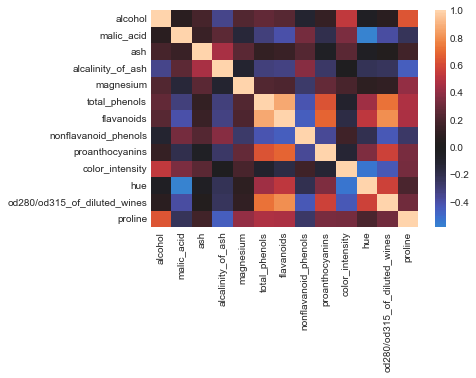

In [394]:
sns.heatmap(wine_train.corr(), center=0)

<AxesSubplot:>

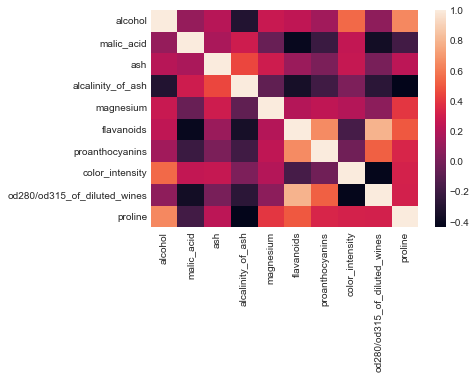

In [403]:
sns.heatmap(wine_data.iloc[:,selector.get_support()].corr())

In [414]:
selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear')) \
    .fit(StandardScaler().fit_transform(wine_train), wine_labels_train)

In [415]:
selector.get_support()

array([ True,  True,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True])

По сути SelectFromModel c помощью l1 регуляризации отобрал признаки с ненулевыми к-тами регрессии(как сделано ниже)

In [416]:
LogisticRegression(penalty='l1', solver='liblinear').fit(wine_train, wine_labels_train).coef_.mean(0)!=0

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True])

In [417]:
pipeline_fselection = make_pipeline(SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear')),
              StandardScaler(),
              LogisticRegression(penalty='l1', solver='liblinear'))

In [418]:
pipeline_fselection.fit(wine_train, wine_labels_train)

Pipeline(steps=[('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              solver='liblinear'))),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [419]:
pipeline_fselection.score(wine_train, wine_labels_train)

1.0

In [ ]:
pipeline_fselection[:]

In [420]:
pipeline_fselection.score(wine_val, wine_labels_val)

1.0

После отбора признаков таким простым способом с последующим масштабированием на тестовых и тренировочных выборках accuracy увеличилось до 1

## Exercise 4 - manual PCA (5 points)
The task is to solve PCA as an optimization problem, without explicitly doing eigen value decomposition.
In the most general setting PCA is minimization of reconstruction error of a projection of given rank $q$

$$\min_{\mu, \lambda_1,\ldots, \lambda_n, \mathbf{V}_q} \sum_{i=1}^n ||x_i - \mu - \mathbf{V}_q \lambda_i||^2$$

With a number of steps that can be found here https://stats.stackexchange.com/a/10260 this task transforms to
 $$\max_{u_i} \sum_{i=1}^q u_i^T \mathbf{S} u_i$$
 where $\mathbf{S}$ is the sample covariance matrix (after standartization) and $u_1, \ldots, u_q$ are the $q$ are orthonormal columns in $\mathbf{V}_q$.
 Let us solve this optimization problem with `scipy.optimize` library.
 
 Additional 2 point are given for visualization of the results.

### PCA (3 points)

In [421]:
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

Find a covariance matrix of standartized data and assing it to S.

In [442]:
## your code
standard_wine = StandardScaler().fit_transform(wine_data)
S = standard_wine.T@standard_wine/(standard_wine.shape[0]-1)

If your code is correct, the following assert should be Ok.

In [451]:
np.linalg.norm(S)

5.787241159764734

In [447]:
assert np.allclose(np.linalg.norm(S), 5.787241159764733)

In [463]:
v = np.random.uniform(size=13)

In [468]:
v/(np.linalg.norm(v))

array([0.08477833, 0.06462485, 0.38388087, 0.0217042 , 0.23229111,
       0.34406312, 0.08490566, 0.39999095, 0.33148473, 0.36576236,
       0.26565295, 0.38535349, 0.19628375])

In [553]:
from scipy.optimize import minimize

def objective(x):
    # your code: write objective of the problem (don't forget that scipy does min while we need max)
    return -x@S@x

def norm_constraint(x):
    # your code: constaraint norm of x to be 1, function should return 0 if constraint holds
    return  1.0 - x@x

con1 = {'type': 'eq', 'fun': norm_constraint}

x0 = np.random.uniform(size=S.shape[0])# your code: initial vector to start optimization
x0 = x0/np.sqrt(x0@x0)

sol = minimize(objective, 
               x0, 
               constraints = [con1]
              )
x0 = sol.x

Hurray! We have first vector! Let's do another one.

In [554]:
x0@x0

1.0000003740589456

In [576]:
def orthogonality_constraint(x):
    # your code: x should be orthogonal to x0, function should return 0 if constraint holds
    return np.round(x@x0, 5)
    

con2 = {'type': 'eq', 'fun': orthogonality_constraint}

x1 = np.random.uniform(size=x0.shape)# your code: initial vector to start optimization
x1 = x1/np.sqrt(x1@x1)

sol = minimize(objective, 
               x1, 
               constraints = [con2]
              )

x1 = sol.x

In [578]:
x1@x0

0.3000859284338378

In [577]:
x1@S@x1

1.4283050509603408

If your solution is correct, the following asserts should be Ok.

In [513]:
assert np.allclose(x0@S@x0, 4.732436977583595)

In [514]:
assert np.allclose(x1@S@x1, 2.5110809296451233)

AssertionError: 

### Visualization (2 points)

Visualize the points after applying custom dimension reduction with 2 components.

## Exercise 5 - Boruta (3 points)

Let us classify handwritten digits 0, 1 and 2. 
To make task not so easy the images are binarized (no shadows of gray present) as it happens with xerocopied documents.

Let us also find out to which parts of an image there's no need to look in order to clasify three digits of interest.

In [55]:
X, y = load_digits(n_class=3, return_X_y=True, as_frame=True)
X = (X>10).astype(int)

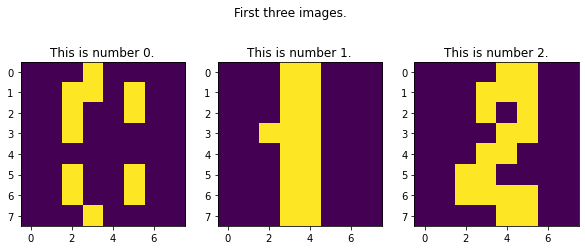

In [56]:
f, ax = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    ax[i].imshow(X.iloc[i].values.reshape(8,8))
    ax[i].set_title(f"This is digit {y[i]}.")
plt.suptitle("First three images.")
plt.show()

Split data into train and test, let test size be 30% of the dataset and fix random state to 42:

In [57]:
X_train, X_val, y_train, y_val = ## your code here

In [58]:
assert y_val.shape[0] == 162
assert y_val.sum() == 169

Fit a RandomForestClassifier with max_depth=13 and evaluate it's performance:

In [59]:
clf = RandomForestClassifier(max_depth=13)

# your code here

acc = # your code here
print(acc)

In [60]:
assert acc > 0.98

Now we will use Boruta to find redundand pixels. If the package is not installed in your system, uncomment and run the following cell.

In [61]:
# ! pip install boruta

In [62]:
from boruta import BorutaPy

feat_selector = BorutaPy(RandomForestClassifier(max_depth=13), 
                         n_estimators='auto', 
                         verbose=0, 
                         max_iter=100,
                         random_state=42)

# your code here: do run the boruta

Let us print redundant pixels as a mask. Does the result looks similar to mine (or to Among us chracters)? 

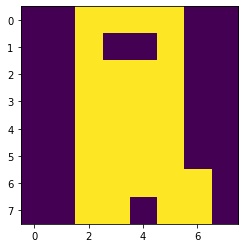

In [64]:
mask = np.array(feat_selector.support_).reshape(8,8)
plt.imshow(mask);

At the end let us redo  classification but only with selected features

In [65]:
clf = RandomForestClassifier(max_depth=13)

# your code here

acc = # your code here
print(acc)

In [66]:
assert acc > 0.99

# Materials & References

1. General article about feature engineering and selection (main reference):
https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic06_features_regression/topic6_feature_engineering_feature_selection.ipynb

2. Feature engineering/preprocessing, using scikit-learn API (great code examples, but really brief explanation):    
https://scikit-learn.org/stable/modules/preprocessing

3. Feature scaling/normalization:     
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

4. Log Transform/power transform:    
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

6. Missing values preprocessing using scikit-learn API (great code examples, great explanation):    
https://scikit-learn.org/stable/modules/impute.html

7. Feature selection scikit-learn API (great code examples, great explanation):   
https://scikit-learn.org/stable/modules/feature_selection.html

8. Melbourne housing dataset source:    
https://www.kaggle.com/anthonypino/melbourne-housing-market